In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path="/content/drive/MyDrive/Explo/UnprocImg32/"
files=os.listdir(path)[:52]
print(files)

classes={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25,'zA':26,'zB':27,'zC':28,'zD':29,'zE':30,'zF':31,'zG':32,'zH':33,'zI':34,'zJ':35,'zK':36,'zL':37,'zM':38,'zN':39,'zO':40,'zP':41,'zQ':42,'zR':43,'zS':44,'zT':45,'zU':46,'zV':47,'zW':48,'zX':49,'zY':50,'zZ':51}

['zV', 'zR', 'zQ', 'zX', 'zU', 'zZ', 'zW', 'zS', 'zY', 'zT', 'zO', 'zL', 'zP', 'zG', 'zN', 'zK', 'zM', 'zI', 'zH', 'zJ', 'zF', 'zA', 'zB', 'x', 'y', 'zC', 'w', 'zE', 'z', 'zD', 's', 'o', 'v', 'q', 'n', 't', 'r', 'm', 'p', 'u', 'd', 'e', 'l', 'g', 'h', 'f', 'c', 'j', 'i', 'k', 'a', 'b']


In [ ]:
import cv2

X=[]
Y=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("dataset created successfully!")

dataset created successfully!


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=.30,random_state=42)

In [ ]:
xtrain.shape

(12955, 32, 32)

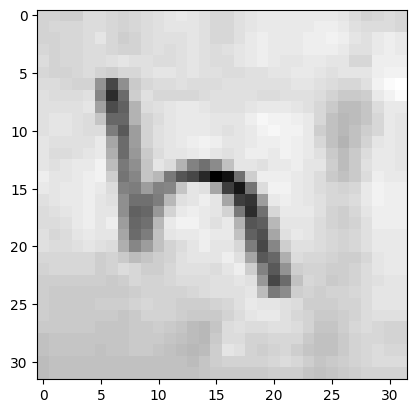

In [ ]:
plt.imshow(xtrain[10],cmap = "gray")

In [ ]:
print(xtrain[0])

[[150 150 148 ... 154 153 152]
 [151 150 149 ... 153 151 151]
 [152 152 150 ... 151 151 150]
 ...
 [150 150 149 ... 154 153 151]
 [150 150 149 ... 154 152 152]
 [143 143 146 ... 126 123 120]]


Normalizing the data

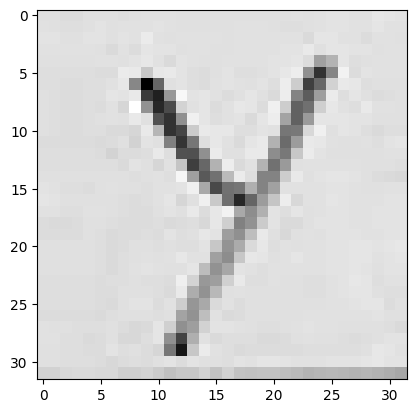

In [ ]:
xtrain = xtrain/255
xtest = xtest/255
plt.imshow(xtrain[0],cmap = "gray")

In [ ]:
print(xtrain[0])

[[0.58823529 0.58823529 0.58039216 ... 0.60392157 0.6        0.59607843]
 [0.59215686 0.58823529 0.58431373 ... 0.6        0.59215686 0.59215686]
 [0.59607843 0.59607843 0.58823529 ... 0.59215686 0.59215686 0.58823529]
 ...
 [0.58823529 0.58823529 0.58431373 ... 0.60392157 0.6        0.59215686]
 [0.58823529 0.58823529 0.58431373 ... 0.60392157 0.59607843 0.59607843]
 [0.56078431 0.56078431 0.57254902 ... 0.49411765 0.48235294 0.47058824]]


In [ ]:
print(ytrain[0])

50


Resizing image to make it suitable for apply convolution operation

In [ ]:
IMG_SIZE = 32
xtrainr=np.array(xtrain).reshape(-1,IMG_SIZE,IMG_SIZE,1)
xtestr=np.array(xtest).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples dimension",xtrainr.shape)
print("Testing Samples dimension",xtestr.shape)

Training Samples dimension (12955, 32, 32, 1)
Testing Samples dimension (5553, 32, 32, 1)


Creating Deep Learning Neural Network

In [ ]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),activation = 'relu',input_shape = (32,32,1)))
model.add(Conv2D(64, (3, 3), activation = 'relu',padding= 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu' , padding ='same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(104, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(52, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                      

In [ ]:
print("Total Training Samples = ",len(xtrainr))

Total Training Samples =  12955


In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [ ]:
history = model.fit(xtrainr,
                    ytrain,
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    validation_split=0.4,
                    callbacks=[early_stopping, mcp_save])


Epoch 1/100
243/243 [==============================] - ETA: 0s - loss: 3.2962 - accuracy: 0.1685
Epoch 1: val_loss improved from inf to 1.60391, saving model to my_model.h5
243/243 [==============================] - 145s 589ms/step - loss: 3.2962 - accuracy: 0.1685 - val_loss: 1.6039 - val_accuracy: 0.5816
Epoch 2/100
243/243 [==============================] - ETA: 0s - loss: 1.4564 - accuracy: 0.5730
Epoch 2: val_loss improved from 1.60391 to 0.80559, saving model to my_model.h5
243/243 [==============================] - 145s 596ms/step - loss: 1.4564 - accuracy: 0.5730 - val_loss: 0.8056 - val_accuracy: 0.7742
Epoch 3/100
243/243 [==============================] - ETA: 0s - loss: 0.8728 - accuracy: 0.7253
Epoch 3: val_loss improved from 0.80559 to 0.57068, saving model to my_model.h5
243/243 [==============================] - 166s 683ms/step - loss: 0.8728 - accuracy: 0.7253 - val_loss: 0.5707 - val_accuracy: 0.8207
Epoch 4/100
243/243 [==============================] - ETA: 0s - los

In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

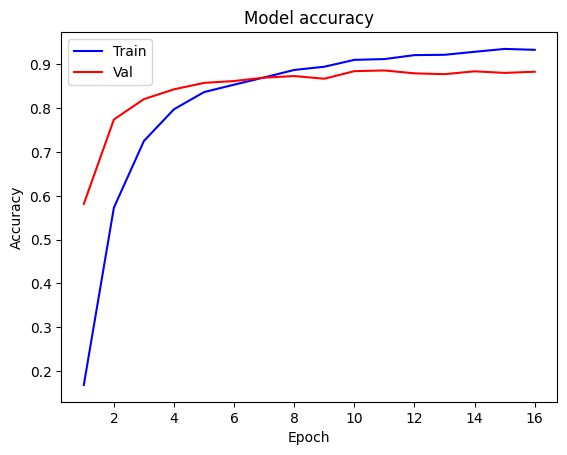

In [ ]:
plotgraph(epochs, acc, val_acc)

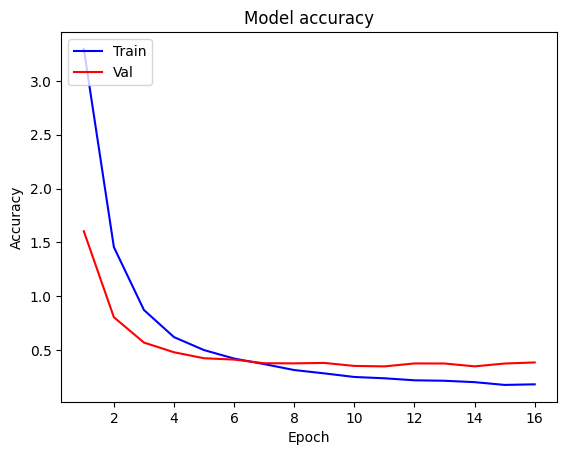

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
test_loss, test_acc = model.evaluate(xtestr, ytest)
print("Test Loss on test samples",test_loss)
print("Validation Accuracy on test samples",test_acc)

174/174 [==============================] - 21s 121ms/step - loss: 0.3876 - accuracy: 0.8793
Test Loss on test samples 0.387605220079422
Validation Accuracy on test samples 0.8793445229530334


In [ ]:
predictions = model.predict([xtestr])

In [ ]:
print(predictions)

In [ ]:
print(np.argmax(predictions[0]))

In [ ]:
plt.imshow(xtest[0])

In [ ]:
print(np.argmax(predictions[100]))

40


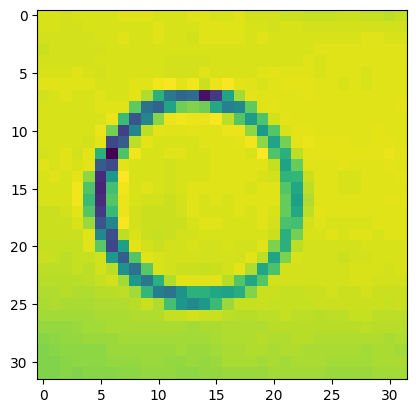

In [ ]:
plt.imshow(xtest[100])